# Explore

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import user, password, host
import numpy as np
import acquire as a
from wordcloud import WordCloud
import nltk.sentiment

In [13]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

Exercises
Do your work for this exercise in a file named explore.


1. USE Spam Data

     a. Load the spam data set.
     
     b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
     
     c. Is there any overlap in the bigrams for the spam data and the ham data?
     
     d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### load data

In [2]:
# load the spam data set
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### wordcloud

In [6]:
# create subgroups
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [44]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [57]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words))

ham_bigrams = pd.Series(nltk.bigrams(ham_words))
all_bigrams = pd.Series(nltk.bigrams(all_words))

In [79]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [80]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

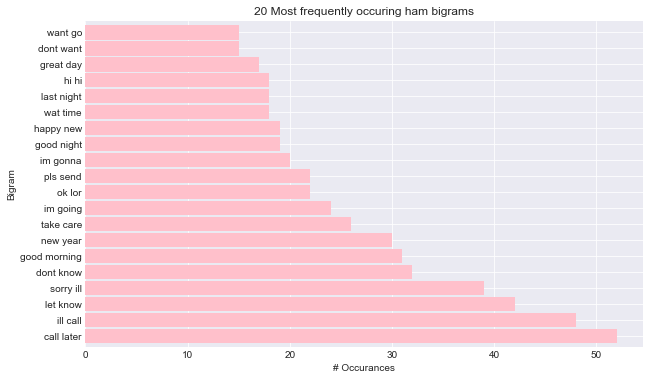

In [64]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [65]:
spam_bigrams

0                   (free, entry)
1                   (entry, wkly)
2                    (wkly, comp)
3                     (comp, win)
4                       (win, fa)
                   ...           
12157        (087187272008, now1)
12158                 (now1, 10p)
12159                  (10p, per)
12160               (per, minute)
12161    (minute, btnationalrate)
Length: 12162, dtype: object

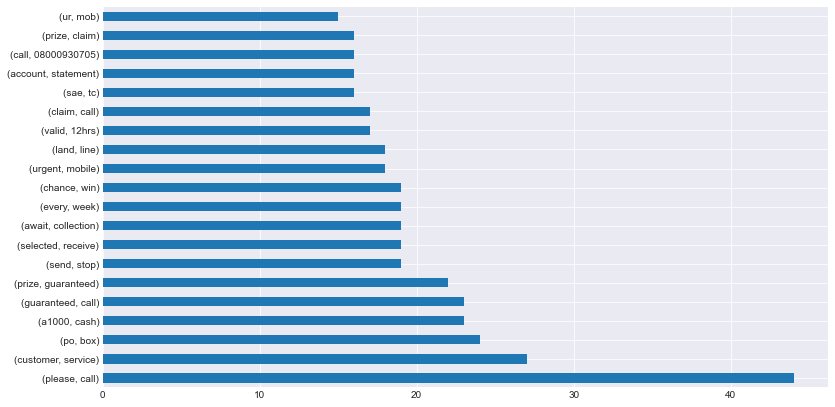

In [66]:
# create and explore bigrams for spam
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(20).plot.barh();

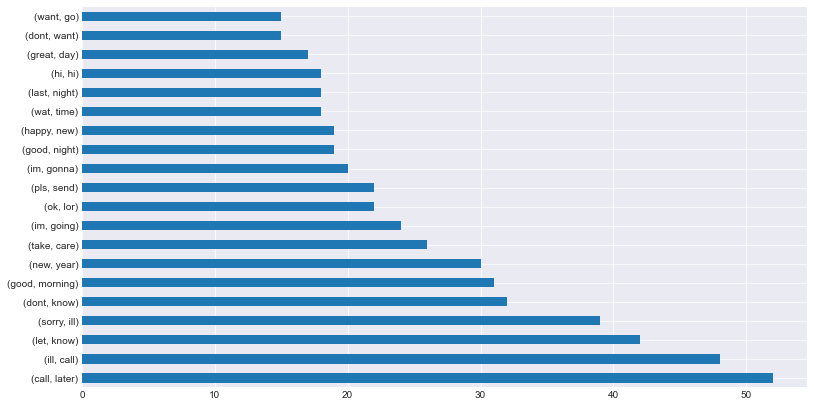

In [67]:
# create and explore bigrams for ham
pd.Series(nltk.bigrams(ham_words)
         ).value_counts().head(20).plot.barh();

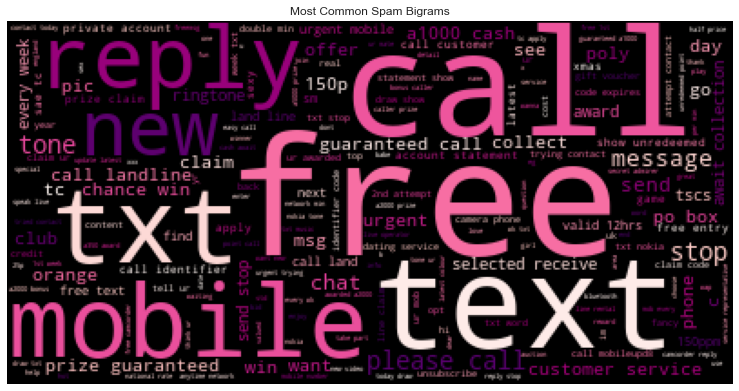

In [70]:
# create WordCloud
img = WordCloud(background_color='black', mode ='RGBA', colormap='RdPu_r'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Bigrams')

plt.show()

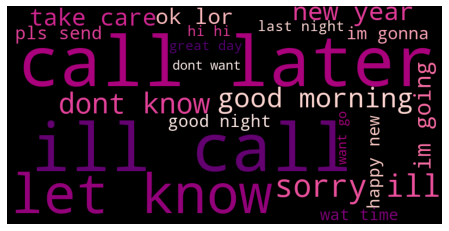

In [81]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400,colormap='RdPu_r').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

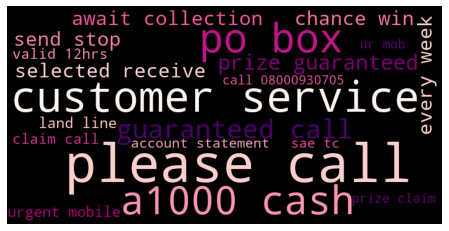

In [83]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400,colormap='RdPu_r').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### overlap

In [84]:
ham_freq = pd.Series(ham_bigrams).value_counts()
spam_freq = pd.Series(spam_bigrams).value_counts()
all_freq = pd.Series(all_bigrams).value_counts()

In [85]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,,ham,spam,all
call,later,52,0,52
ill,call,48,0,48
let,know,42,0,42
sorry,ill,39,0,39
dont,know,32,6,38


<AxesSubplot:>

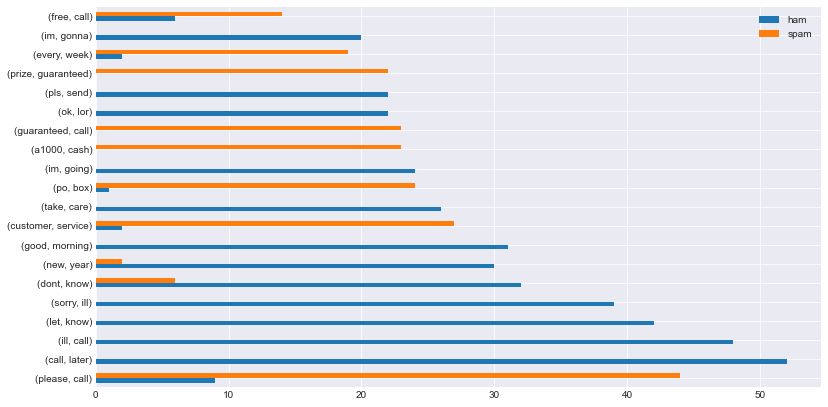

In [86]:
# is there overlap in ham bigrams and spam bigrams
# plt.rc('font', size=18)
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh()

There is very little overlap in the top 20 bigrams of ham and spam

### trigrams

In [89]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

In [90]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

In [91]:
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))

top_20_all_trigrams.head()

(ill, call, later)           42
(sorry, ill, call)           38
(prize, guaranteed, call)    21
(happy, new, year)           19
(call, customer, service)    15
dtype: int64

Under trigrams all top 5 match some of the trigrams in ham words and spam words.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [98]:
codeup_blog = a.codeup_blog()

/Users/yvetteibarra/codeup-data-science/natural-language-processing-exercises/acquire.py:59: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 59 of the file /Users/yvetteibarra/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(url_response.text)


In [ ]:
codeup_blog

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [97]:
inshort_df = a.inshort_info()

In [ ]:
inshort_df